<a href="https://colab.research.google.com/github/vjbarayuga/Week9-Unsupervised_ML_Clustering/blob/main/Project2_Part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import time
import random
%matplotlib inline

In [16]:
# load dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/spect/SPECTF.test'
df = read_csv(url, header=None, na_values='?')
df.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44
0,1,67,68,73,78,65,63,67,60,63,62,71,68,76,73,59,61,62,56,74,73,78,76,79,79,70,70,68,67,65,67,76,75,63,61,61,56,76,75,74,77,76,74,59,68
1,1,75,74,71,71,62,58,70,64,71,68,76,68,71,71,58,58,70,69,70,72,75,73,74,72,66,60,63,66,70,64,75,70,64,62,66,62,68,69,69,66,64,58,57,52
2,1,83,64,66,67,67,74,74,72,64,68,75,73,78,73,72,57,71,67,73,65,78,73,76,69,63,57,63,53,67,60,77,74,69,64,67,64,69,63,68,54,65,64,43,42
3,1,72,66,65,65,64,61,71,78,73,69,68,65,62,65,66,66,72,74,67,61,77,71,68,65,64,60,73,69,70,69,74,72,61,63,69,68,68,63,71,72,65,63,58,60
4,1,62,60,69,61,63,63,70,68,70,65,77,56,71,65,69,68,74,78,77,70,80,73,79,75,76,67,74,69,66,71,70,61,54,54,66,66,58,56,72,73,71,64,49,42


In [19]:
col_name = ['target', 'F1R', 'F1S', 'F2R', 'F2S', 'F3R', 'F3S', 'F4R', 'F4S', 'F5R','F5S','F6R','F6S','F7R','F7S','F8R','F8S','F9R','F9S','F10R',
    'F10S',  'F11R','F11S','F12R','F12S','F13R','F13S','F14R','F14S','F15R','F15S','F16R','F16S','F17R','F17S','F18R','F18S','F19R','F19S',   'F20R',
    'F20S','F21R','F21S','F22R','F22S']

In [20]:
len(col_name)

45

In [21]:
df_spectf = pd.read_table(url,sep=",",names= col_name)

In [22]:
df_spectf.head()

,target,F1R,F1S,F2R,F2S,F3R,F3S,F4R,F4S,F5R,F5S,F6R,F6S,F7R,F7S,F8R,F8S,F9R,F9S,F10R,F10S,F11R,F11S,F12R,F12S,F13R,F13S,F14R,F14S,F15R,F15S,F16R,F16S,F17R,F17S,F18R,F18S,F19R,F19S,F20R,F20S,F21R,F21S,F22R,F22S
0,1,67,68,73,78,65,63,67,60,63,62,71,68,76,73,59,61,62,56,74,73,78,76,79,79,70,70,68,67,65,67,76,75,63,61,61,56,76,75,74,77,76,74,59,68
1,1,75,74,71,71,62,58,70,64,71,68,76,68,71,71,58,58,70,69,70,72,75,73,74,72,66,60,63,66,70,64,75,70,64,62,66,62,68,69,69,66,64,58,57,52
2,1,83,64,66,67,67,74,74,72,64,68,75,73,78,73,72,57,71,67,73,65,78,73,76,69,63,57,63,53,67,60,77,74,69,64,67,64,69,63,68,54,65,64,43,42
3,1,72,66,65,65,64,61,71,78,73,69,68,65,62,65,66,66,72,74,67,61,77,71,68,65,64,60,73,69,70,69,74,72,61,63,69,68,68,63,71,72,65,63,58,60
4,1,62,60,69,61,63,63,70,68,70,65,77,56,71,65,69,68,74,78,77,70,80,73,79,75,76,67,74,69,66,71,70,61,54,54,66,66,58,56,72,73,71,64,49,42


In [23]:
df_spectf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 45 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   target  187 non-null    int64
 1   F1R     187 non-null    int64
 2   F1S     187 non-null    int64
 3   F2R     187 non-null    int64
 4   F2S     187 non-null    int64
 5   F3R     187 non-null    int64
 6   F3S     187 non-null    int64
 7   F4R     187 non-null    int64
 8   F4S     187 non-null    int64
 9   F5R     187 non-null    int64
 10  F5S     187 non-null    int64
 11  F6R     187 non-null    int64
 12  F6S     187 non-null    int64
 13  F7R     187 non-null    int64
 14  F7S     187 non-null    int64
 15  F8R     187 non-null    int64
 16  F8S     187 non-null    int64
 17  F9R     187 non-null    int64
 18  F9S     187 non-null    int64
 19  F10R    187 non-null    int64
 20  F10S    187 non-null    int64
 21  F11R    187 non-null    int64
 22  F11S    187 non-null    int64
 23  F12R    187 non

In [24]:
# get column names
column_names = df_spectf.columns

# for each attributes (columns), print value counts
for column_name in  column_names:
    print(df_spectf[column_name].value_counts())

1    172
0     15
Name: target, dtype: int64
65    14
68    14
64    12
67    11
73    11
69     8
75     8
71     8
70     8
57     7
58     7
61     7
62     7
72     7
66     6
77     5
59     5
76     4
63     4
60     4
74     4
54     4
55     3
79     2
56     2
47     2
33     1
46     1
32     1
37     1
40     1
42     1
83     1
49     1
51     1
52     1
80     1
78     1
23     1
Name: F1R, dtype: int64
66    12
69    11
70    10
63     9
65     9
59     8
60     8
77     7
75     7
74     7
73     7
58     7
68     7
67     7
54     6
62     6
80     5
64     5
71     5
57     4
55     4
76     4
72     3
56     3
47     3
51     3
61     2
43     2
49     2
50     2
52     2
53     1
46     1
44     1
79     1
42     1
41     1
40     1
29     1
23     1
21     1
Name: F1S, dtype: int64
70    15
69    14
64    12
73    11
71    11
72    11
65    11
74    10
67    10
75     8
62     8
76     7
77     7
68     7
66     7
78     5
63     5
58     4
54     3
61     3
59     

In [25]:
df_spectf.shape

(187, 45)

In [26]:
type(df_spectf)

pandas.core.frame.DataFrame

In [29]:
df_spectf.describe().T

,count,mean,std,min,25%,50%,75%,max
target,187.0,0.919786,0.272353,0.0,1.0,1.0,1.0,1.0
F1R,187.0,65.128342,8.961963,23.0,61.0,66.0,71.0,83.0
F1S,187.0,63.786096,10.157746,21.0,58.5,65.0,70.0,80.0
F2R,187.0,68.304813,6.849231,38.0,64.0,69.0,73.0,82.0
F2S,187.0,68.320856,9.046697,34.0,65.0,70.0,74.0,84.0
F3R,187.0,63.818182,9.569165,21.0,60.0,65.0,70.0,82.0
F3S,187.0,62.374332,10.069062,25.0,59.0,64.0,69.0,79.0
F4R,187.0,69.352941,9.513631,21.0,67.0,71.0,75.0,85.0
F4S,187.0,68.534759,10.614082,20.0,66.0,71.0,75.0,81.0
F5R,187.0,62.839572,9.604879,12.0,60.5,65.0,68.0,76.0


## Check Duplicate Value in the dataset

In [30]:
df_spectf.columns

Index(['target', 'F1R', 'F1S', 'F2R', 'F2S', 'F3R', 'F3S', 'F4R', 'F4S', 'F5R',
       'F5S', 'F6R', 'F6S', 'F7R', 'F7S', 'F8R', 'F8S', 'F9R', 'F9S', 'F10R',
       'F10S', 'F11R', 'F11S', 'F12R', 'F12S', 'F13R', 'F13S', 'F14R', 'F14S',
       'F15R', 'F15S', 'F16R', 'F16S', 'F17R', 'F17S', 'F18R', 'F18S', 'F19R',
       'F19S', 'F20R', 'F20S', 'F21R', 'F21S', 'F22R', 'F22S'],
      dtype='object')

In [31]:
df_spectf.duplicated().sum()

0

In [32]:
df_spectf.duplicated(keep=False).sum()

0

In [33]:
# print the duplicate dataset
df_spectf.loc[df.duplicated(keep=False)]

,target,F1R,F1S,F2R,F2S,F3R,F3S,F4R,F4S,F5R,F5S,F6R,F6S,F7R,F7S,F8R,F8S,F9R,F9S,F10R,F10S,F11R,F11S,F12R,F12S,F13R,F13S,F14R,F14S,F15R,F15S,F16R,F16S,F17R,F17S,F18R,F18S,F19R,F19S,F20R,F20S,F21R,F21S,F22R,F22S


# Check In-consistent Values

In [34]:
df_spectf.columns

Index(['target', 'F1R', 'F1S', 'F2R', 'F2S', 'F3R', 'F3S', 'F4R', 'F4S', 'F5R',
       'F5S', 'F6R', 'F6S', 'F7R', 'F7S', 'F8R', 'F8S', 'F9R', 'F9S', 'F10R',
       'F10S', 'F11R', 'F11S', 'F12R', 'F12S', 'F13R', 'F13S', 'F14R', 'F14S',
       'F15R', 'F15S', 'F16R', 'F16S', 'F17R', 'F17S', 'F18R', 'F18S', 'F19R',
       'F19S', 'F20R', 'F20S', 'F21R', 'F21S', 'F22R', 'F22S'],
      dtype='object')

In [35]:
# get column names
column_names = df_spectf.columns

# for each attributes (columns), print value counts
for column_name in  column_names:
    print(df_spectf[column_name].unique())

[1 0]
[67 75 83 72 62 68 80 77 69 65 71 64 57 73 66 74 79 61 63 55 70 60 33 58
 46 47 78 59 54 51 49 76 56 52 42 23 37 32 40]
[68 74 64 66 60 63 76 61 69 73 75 54 43 65 59 56 80 67 70 58 71 44 21 40
 77 57 55 47 50 52 42 29 46 62 79 49 51 23 41 72 53]
[73 71 66 65 69 67 77 62 70 52 61 54 75 76 72 78 64 74 68 38 57 48 63 51
 58 59 56 82 55 80 60 79 46]
[78 71 67 65 61 76 58 69 74 75 80 46 50 68 48 79 72 73 70 82 54 43 66 77
 55 60 63 53 51 44 83 84 62 57 59 56 35 34 40 64]
[65 62 67 64 63 60 70 56 59 24 43 72 76 61 69 66 79 21 82 44 34 74 68 55
 40 51 41 54 58 80 57 50 75 71 52 73 77 45 36 32]
[63 58 74 61 72 68 57 66 67 54 31 62 71 79 69 52 59 64 65 70 75 25 76 48
 41 34 60 55 45 44 53 56 26 28 78 36 49 43 77 73]
[67 70 74 71 69 57 63 76 65 79 61 75 77 73 66 60 78 85 41 55 54 64 80 52
 58 72 21 68 39 56 62 81 59 32 26 53 30]
[60 64 72 78 68 76 55 73 70 65 77 66 44 74 71 46 67 27 62 50 54 53 75 63
 59 81 79 45 80 52 25 69 56 32 23 49 20 61]
[63 71 64 73 70 69 59 67 44 62 66 61 53 68 65 

# Check Null Values

In [36]:
df_spectf.isnull().sum()

target    0
F1R       0
F1S       0
F2R       0
F2S       0
F3R       0
F3S       0
F4R       0
F4S       0
F5R       0
F5S       0
F6R       0
F6S       0
F7R       0
F7S       0
F8R       0
F8S       0
F9R       0
F9S       0
F10R      0
F10S      0
F11R      0
F11S      0
F12R      0
F12S      0
F13R      0
F13S      0
F14R      0
F14S      0
F15R      0
F15S      0
F16R      0
F16S      0
F17R      0
F17S      0
F18R      0
F18S      0
F19R      0
F19S      0
F20R      0
F20S      0
F21R      0
F21S      0
F22R      0
F22S      0
dtype: int64

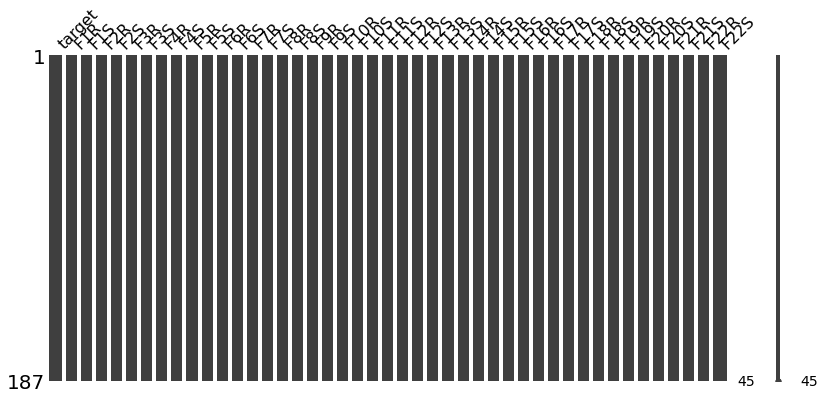

In [37]:
import missingno as msno 
# Visualize missing values as a matrix 
msno.matrix(df_spectf,figsize=(12,6)) 

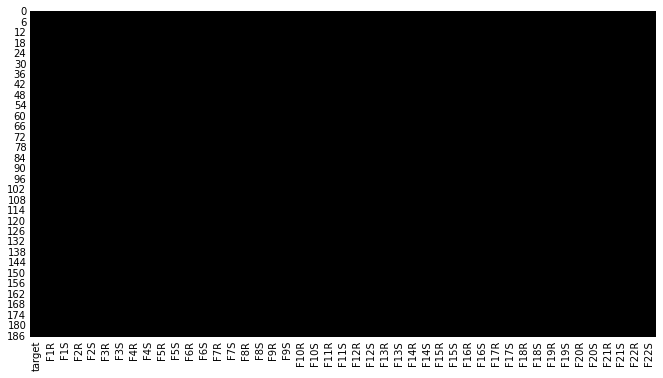

In [38]:
#sns.heatmap(df.isnull(),cmap="viridis")
plt.figure(figsize=(10,6))
sns.heatmap(
    data=df_spectf.isnull(),
    cmap=sns.color_palette(['black', 'yellow', 'orange', 'white']),cbar=False)

In [39]:
## Now checks the correlation between the variables
df_spectf.corr()

,target,F1R,F1S,F2R,F2S,F3R,F3S,F4R,F4S,F5R,F5S,F6R,F6S,F7R,F7S,F8R,F8S,F9R,F9S,F10R,F10S,F11R,F11S,F12R,F12S,F13R,F13S,F14R,F14S,F15R,F15S,F16R,F16S,F17R,F17S,F18R,F18S,F19R,F19S,F20R,F20S,F21R,F21S,F22R,F22S
target,1.000000,-0.033205,-0.072310,-0.047347,-0.100783,-0.162407,-0.218370,-0.084463,-0.117129,-0.109763,-0.111054,-0.047473,-0.090615,-0.094505,-0.163484,-0.167806,-0.157609,-0.065156,-0.051781,-0.111721,-0.068210,-0.084087,-0.043544,-0.111261,-0.108912,-0.187924,-0.204077,-0.043510,-0.022509,-0.112002,-0.124314,-0.052769,-0.120838,-0.084401,-0.121160,-0.103840,-0.122409,-0.060936,-0.069405,-0.158235,-0.180498,-0.201578,-0.233921,-0.224858,-0.213390
F1R,-0.033205,1.000000,0.601643,0.380365,0.376806,0.184712,0.208528,0.599774,0.424983,0.549938,0.411568,0.362452,0.223068,0.058007,0.077972,0.137556,0.191406,0.458335,0.408751,0.149477,0.206677,0.176174,0.070438,0.073001,0.084748,0.109477,0.048005,0.184299,0.063172,0.475034,0.349917,0.181529,0.160883,0.028626,-0.089392,0.422417,0.330402,0.317041,0.255071,0.451074,0.327409,0.089097,0.097360,0.021205,0.050646
F1S,-0.072310,0.601643,1.000000,0.271874,0.455517,0.055241,0.317336,0.415818,0.519327,0.455041,0.629239,0.352332,0.492800,0.010139,0.080726,-0.002768,0.127364,0.323507,0.391826,0.146654,0.294343,0.105505,0.143450,-0.000075,0.107356,0.046546,0.055046,0.133945,0.151532,0.477081,0.508655,0.180045,0.229487,0.005113,0.025522,0.377079,0.418680,0.299668,0.517828,0.396013,0.488027,0.088510,0.073545,0.016101,0.083307
F2R,-0.047347,0.380365,0.271874,1.000000,0.601705,0.166304,0.149028,0.300404,0.141069,0.246003,0.216476,0.480868,0.301811,0.235419,0.273595,0.068265,0.035067,0.191073,0.129143,0.095347,-0.003524,0.186116,0.114622,0.098451,0.110760,0.075274,0.095392,0.051877,0.000072,0.340808,0.193685,0.467834,0.267551,0.284240,0.042401,0.188291,0.139054,0.287469,0.195695,0.288137,0.223436,0.147974,0.116902,0.057365,0.084343
F2S,-0.100783,0.376806,0.455517,0.601705,1.000000,0.094517,0.226083,0.239487,0.233756,0.310953,0.359562,0.416843,0.528861,0.236616,0.399704,-0.021801,0.104415,0.121042,0.065483,0.177832,0.277323,0.224738,0.237416,0.195886,0.320427,0.160371,0.134620,0.084945,-0.038621,0.317019,0.370036,0.467341,0.632300,0.280456,0.377947,0.178453,0.202181,0.155147,0.309793,0.263244,0.379087,0.137220,0.169305,0.103953,0.129407
F3R,-0.162407,0.184712,0.055241,0.166304,0.094517,1.000000,0.710749,0.262919,0.394523,0.231966,0.184040,0.014061,0.048362,0.412879,0.313565,0.607831,0.516344,0.253921,0.190019,0.243346,0.128568,0.085105,0.065128,0.303395,0.285881,0.508444,0.455460,0.142679,0.061674,0.335914,0.293423,0.146720,0.103677,0.068978,0.073255,0.349090,0.299781,-0.022380,-0.110333,0.367660,0.225666,0.503053,0.464465,0.421015,0.398157
F3S,-0.218370,0.208528,0.317336,0.149028,0.226083,0.710749,1.000000,0.350626,0.656415,0.251063,0.342526,0.155800,0.193961,0.449601,0.413405,0.683897,0.721371,0.366321,0.361172,0.266906,0.217948,0.098935,0.213460,0.339543,0.383671,0.611147,0.617017,0.244602,0.270608,0.481531,0.563642,0.287892,0.301457,0.101773,0.161762,0.483734,0.581697,0.020715,0.096611,0.455714,0.473037,0.638465,0.695800,0.491006,0.594700
F4R,-0.084463,0.599774,0.415818,0.300404,0.239487,0.262919,0.350626,1.000000,0.679731,0.595992,0.433502,0.283484,0.142858,0.014356,-0.070463,0.337675,0.402211,0.728703,0.679313,0.229514,0.197694,0.212308,0.058148,0.041168,0.016577,0.179831,0.168893,0.426706,0.308243,0.500615,0.459927,0.102273,0.144612,-0.050372,-0.019498,0.676583,0.551457,0.428249,0.254531,0.644387,0.468698,0.213282,0.228189,0.079135,0.160490
F4S,-0.117129,0.424983,0.519327,0.141069,0.233756,0.394523,0.656415,0.679731,1.000000,0.379337,0.467883,0.167293,0.170910,0.161190,0.120979,0.484067,0.569532,0.610022,0.670467,0.232139,0.212159,0.117100,0.155294,0.116482,0.142162,0.360461,0.337529,0.335635,0.358045,0.677039,0.686115,0.150175,0.160252,-0.047628,-0.023591,0.701032,0.764119,0.210451,0.310271,0.663214,0.641950,0.429595,0.433020,0.277691,0.354779
F5R,-0.109763,0.549938,0.455041,0.246003,

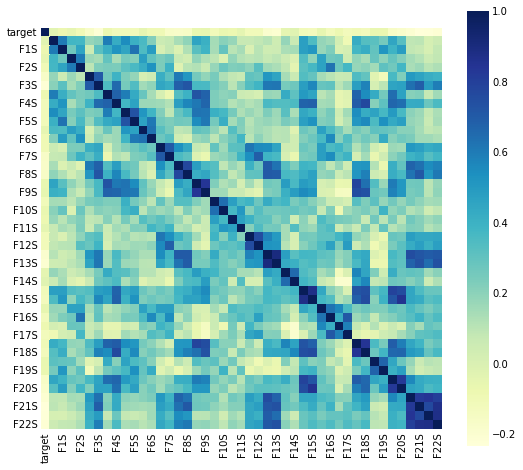

In [40]:
## Now visualise the co-relation
plt.figure(figsize = (8,8))
sns.heatmap(df_spectf.corr(),cmap="YlGnBu",vmax=1,square=True)

# Treat Duplicate, Inconsistent and Null Values

In [ ]:
# So far there are no inconsistent values, duplicate values and missing values to impute